In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.lines import Line2D

import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

font = {'size'   : 12}

matplotlib.rc('font', **font)

In [21]:
data_dir = "/homes/ukumaras/Projects/fast"
down_dir = "~/Downloads"

twitter_base = pd.read_csv(f"{data_dir}/results_mem/CkQST_KNN_NO_twitter_maxk3_mem.csv")
spatialskew_base = pd.read_csv(f"{data_dir}/results_mem/CkQST_KNN_NO_spatialskew_maxk3_mem.csv")
spatialuni_base = pd.read_csv(f"{data_dir}/results_mem/CkQST_KNN_NO_spatialuni_maxk3_mem.csv")
textuni_base = pd.read_csv(f"{data_dir}/results_mem/CkQST_KNN_NO_textuni_maxk3_mem.csv")
place_base = pd.read_csv(f"{data_dir}/results_mem/CkQST_KNN_NO_places_maxk3_mem.csv")

twitter_adopt = pd.read_csv(f"{down_dir}/results_mem/AdoptCkQST_KNN_NO_twitter_maxk3_mem.csv")
spatialskew_adopt = pd.read_csv(f"{down_dir}/results_mem/AdoptCkQST_KNN_NO_spatialskew_maxk3_mem.csv")
spatialuni_adopt = pd.read_csv(f"{down_dir}/results_mem/AdoptCkQST_KNN_NO_spatialuni_maxk3_mem.csv")
textuni_adopt = pd.read_csv(f"{down_dir}/results_mem/AdoptCkQST_KNN_NO_textuni_maxk3_mem.csv")
place_adopt = pd.read_csv(f"{down_dir}/results_mem/AdoptCkQST_KNN_NO_places_maxk3_mem.csv")

twitter_fast = pd.read_csv(f"{data_dir}/results_mem/FAST_KNN_NO_ObjIndex_twitter_maxk3_mem.csv")
spatialskew_fast = pd.read_csv(f"{data_dir}/results_mem/FAST_KNN_NO_ObjIndex_spatialskew_maxk3_mem.csv")
spatialuni_fast = pd.read_csv(f"{data_dir}/results_mem/FAST_KNN_NO_ObjIndex_spatialuni_maxk3_mem.csv")
textuni_fast = pd.read_csv(f"{data_dir}/results_mem/FAST_KNN_NO_ObjIndex_textuni_maxk3_mem.csv")
places_fast = pd.read_csv(f"{data_dir}/results_mem/FAST_KNN_NO_ObjIndex_places_maxk3_mem.csv")

df = pd.concat([twitter_base, spatialuni_base, spatialskew_base, textuni_base, place_base, twitter_adopt, place_adopt, spatialuni_adopt, spatialskew_adopt, textuni_adopt, twitter_fast, spatialuni_fast, spatialskew_fast, textuni_fast, places_fast])
df = pd.DataFrame(df[df.num_queries == 1000000]).groupby(['name', 'num_queries']).mean().reset_index() #[df.num_queries == 5000000]
df['index'] = df['name'].apply(lambda x: x.split("_")[0])

ds_map = {
    'twitter': 'Tweets',
    'spatialuni': 'SpatialUni',
    'spatialskew': 'SpatialSkewL',
    'textuni': 'TextUni',
    'places': 'Places',
}
df['dataset'] = df['name'].apply(lambda x: x.split("_")[-3] if x.split("_")[-3] not in ds_map else ds_map[x.split("_")[-3]])

df['name'] = df['name'].apply(lambda x: x.split("_")[0] + " - " + x.split("_")[-3])
df['num_queries'] = (df['num_queries'] / 1000000).astype(int)
df

,name,num_queries,creation_time,search_time,num_objects,k,create_object_mem,create_query_mem,create_query_idx_mem,create_object_idx_mem,...,search_query_mem,search_query_idx_mem,search_object_idx_mem,search_query_struct_mem,search_query_keymap_mem,clean_time,knn_deg_ratio,knn_ar_thresh,index,dataset
0,AdoptCkQST - places,1,6.261240e+11,1.005650e+11,100000.0,5.0,47002840.0,445338080.0,4.902822e+08,101929616.0,...,445338080.0,4.902822e+08,183954544.0,490281968.0,1152560.0,NaN,NaN,NaN,AdoptCkQST,Places
1,AdoptCkQST - spatialskew,1,2.508173e+12,5.513567e+11,100000.0,5.0,52712312.0,510287000.0,5.979285e+08,132729928.0,...,510287000.0,5.979285e+08,258819592.0,597928296.0,27789624.0,NaN,NaN,NaN,AdoptCkQST,SpatialSkewL
2,AdoptCkQST - spatialuni,1,2.452778e+12,5.852171e+11,100000.0,5.0,52714696.0,510298104.0,5.979172e+08,119495184.0,...,510298104.0,5.979172e+08,237425968.0,597917056.0,27753392.0,NaN,NaN,NaN,AdoptCkQST,SpatialUni
3,AdoptCkQST - textuni,1,3.934262e+09,5.719536e+08,100000.0,5.0,56441488.0,549624232.0,6.198998e+08,121887600.0,...,549624232.0,6.198998e+08,231370768.0,619899656.0,171509120.0,NaN,NaN,NaN,AdoptCkQST,TextUni
4,AdoptCkQST - twitter,1,2.469078e+12,4.724172e+11,100000.0,5.0,52713904.0,510289784.0,5.984738e+08,137441800.0,...,510289784.0,5.984738e+08,272927216.0,598473616.0,27769168.0,NaN,NaN,NaN,AdoptCkQST,Tweets
5,CkQST - places,1,5.480582e+11,1.365800e+10,100000.0,5.0,43002840.0,349338080.0,4.524726e+08,97929616.0,...,552139144.0,6.552737e+08,172257104.0,NaN,NaN,NaN,NaN,NaN,CkQST,Places
6,CkQST - spatialskew,1,2.404023e+12,3.105371e+09,100000.0,5.0,48712312.0,414287000.0,1.063414e+09,128729928.0,...,438646840.0,1.087774e+09,241103128.0,NaN,NaN,NaN,NaN,NaN,CkQST,SpatialSkewL
7,CkQST - spatialuni,1,2.334482e+12,3.808749e+09,100000.0,5.0,48714696.0,414298104.0,1.060296e+09,115495184.0,...,438589088.0,1.084587e+09,220366768.0,NaN,NaN,NaN,NaN,NaN,CkQST,SpatialUni
8,CkQST - textuni,1,2.017107e+10,5.890067e+08,100000.0,5.0,52441488.0,453624232.0,1.881181e+09,117887600.0,...,453624232.0,1.881181e+09,223370768.0,NaN,NaN,NaN,NaN,NaN,CkQST,TextUni
9,CkQST - twitter,1,2.350342e+12,2.817357e+09,100000.0,5.0,48714952.0,414288584.0,1.061329e+09,133450288.0,...,438607288.0,1.085647e+09,253924816.0,NaN,NaN,NaN,NaN,NaN,CkQST,Tweets


In [22]:
summary = pd.DataFrame(df.drop(columns=['index', 'dataset', 'creation_time', 'search_time', 'k', 'knn_deg_ratio', 'knn_ar_thresh']).melt(id_vars=['name', 'num_queries', 'num_objects'], var_name='object', value_name='mem'))
summary

,name,num_queries,num_objects,object,mem
0,AdoptCkQST - places,1,100000.0,create_object_mem,47002840.0
1,AdoptCkQST - spatialskew,1,100000.0,create_object_mem,52712312.0
2,AdoptCkQST - spatialuni,1,100000.0,create_object_mem,52714696.0
3,AdoptCkQST - textuni,1,100000.0,create_object_mem,56441488.0
4,AdoptCkQST - twitter,1,100000.0,create_object_mem,52713904.0
...,...,...,...,...,...
160,FAST - places,1,100000.0,clean_time,NaN
161,FAST - spatialskew,1,100000.0,clean_time,NaN
162,FAST - spatialuni,1,100000.0,clean_time,NaN
163,FAST - textuni,1,100000.0,clean_time,NaN


### Memory

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'create_object_mem'),
  Text(1, 0, 'create_query_mem'),
  Text(2, 0, 'create_query_idx_mem'),
  Text(3, 0, 'create_object_idx_mem'),
  Text(4, 0, 'search_object_mem'),
  Text(5, 0, 'search_query_mem'),
  Text(6, 0, 'search_query_idx_mem'),
  Text(7, 0, 'search_object_idx_mem'),
  Text(8, 0, 'search_query_struct_mem'),
  Text(9, 0, 'search_query_keymap_mem'),
  Text(10, 0, 'clean_time')])

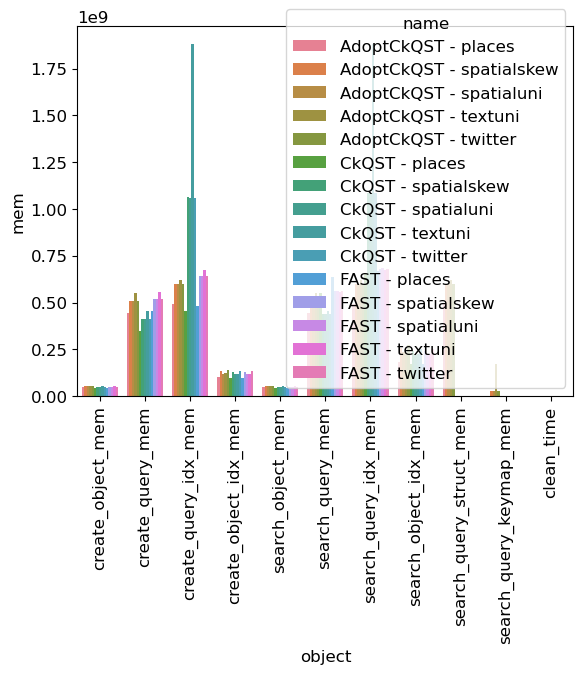

In [23]:
sns.barplot(x='object', y='mem', hue='name', data=summary)
plt.xticks(rotation=90)

In [24]:
mem = pd.DataFrame(df.loc[:, ['index', 'dataset', 'search_query_idx_mem', 'search_query_mem']])
mem['memory'] = (mem['search_query_idx_mem'] - mem['search_query_mem']) / (1024)
mem = mem.drop(columns=['search_query_idx_mem', 'search_query_mem'])
mem

,index,dataset,memory
0,AdoptCkQST,Places,4.389070e+04
1,AdoptCkQST,SpatialSkewL,8.558739e+04
2,AdoptCkQST,SpatialUni,8.556557e+04
3,AdoptCkQST,TextUni,6.862853e+04
4,AdoptCkQST,Tweets,8.611721e+04
5,CkQST,Places,1.007174e+05
6,CkQST,SpatialSkewL,6.339133e+05
7,CkQST,SpatialUni,6.308578e+05
8,CkQST,TextUni,1.394099e+06
9,CkQST,Tweets,6.318750e+05


<Axes: xlabel='dataset', ylabel='memory'>

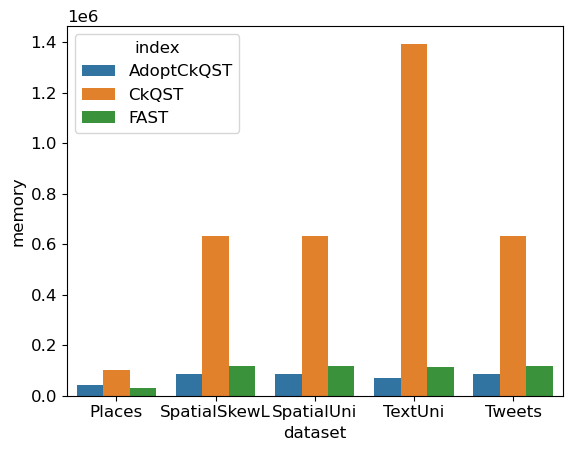

In [25]:
sns.barplot(x='dataset', y='memory', hue='index', data=mem)

In [26]:
out = mem.pivot(index='dataset', columns='index', values='memory').reset_index()
out

index,dataset,AdoptCkQST,CkQST,FAST
0,Places,43890.703125,1.007174e+05,29225.406250
1,SpatialSkewL,85587.390625,6.339133e+05,119430.367188
2,SpatialUni,85565.570312,6.308578e+05,119628.414062
3,TextUni,68628.531250,1.394099e+06,114487.023438
4,Tweets,86117.210938,6.318750e+05,118658.921875


In [27]:
out.to_csv('out_mem.dat', header=False, index=False, sep='\t')